<div style="background-color:rgba(0, 167, 255, 0.6);border-radius:5px;display:fill">
    <h1><center>Tabular Playground Series - April 2022</center></h1>
</div>

We are given 12 sensor data and based on the sensor data we need to do binary classification. Time series classification is very well known concept in  industry applications. The simplest example is doctor using stethoscope to hear the heart sound and get an indication of health issue. Another example is  ECG (electrocardiogram), which records the electrical activity of the heart and is widely be used to diagnose various heart problems.  ECG of the healthy person vs heart patient is shown below.

<img src= "https://europepmc.org/articles/PMC5856087/bin/sensors-18-00379-g003.jpg" alt ="ECG" style='width: 800px;'>



<div class="alert alert-block alert-info"> 📌 As you can see above figure, the classification depends on features such as the length of the cycle, peak value and depression value. In our example also we might need to develop an model which can also capture such features</div>





## <span style="color:crimson;"> DONT FORGET TO UPVOTE IF YOU FIND IT USEFUL.......!!!!!! </span>

<div style="background-color:rgba(255, 69, 0, 0.5);border-radius:5px;display:fill">
    <h1><center> Quick summary of EDAs </center></h1>
</div>
<a id="2"></a><h2></h2>
<div style="background-color:rgba(0, 167, 255, 0.6);border-radius:10px;display:fill">

The training dataset has 1558080 rows which consists of 25968 sequences. Each sequence consists of measurements at 60 different time steps. Our objective was to predict binary state for each sequence.  25968 binary states are provided in train lables csv file for training purposes.
 <br> 
##  Subject:  
•	There are in total 991 subjects: 672 subjects in the train set and 319 subjects in the test set.  <br> 
•	The train and test subjects have completely different values, hence cannot be used as feature.  <br> 
•	As observed by @sytuannguyen subjects with more than 100 sequences have more than 80% of state 1. This is an great observation, if we can somehow materialize on it to predict the state. As @ambrosm suggested, it might be good idea to use GroupKFold cross-validation with the subjects as groups.  <br> 
Sequence:  <br> 
•	As mentioned previously, there are in total 25968 sequences in training set. Each sequence consists of measurements at 60 different time steps.   <br> 
•	Another observation is that the number of sequences in each subject also can be used as a feature (@ambrosm). <br> 

##  Sensors:  <br> 
•	In total 13 different sensors are present in the present dataset. <br> 
•	Almost all the Kagglers are on the agreement that Sensor-2 is dominating when compared with other sensors. Mostly, Sensor-2 has discrete levels which changes level only from time to time.  <br> 
•	On the closer investigation, it has been noticed that each sensor data has outliers.  <br> 
•	Most sensor features values have big amounts of zeros and they are not normally distributed except Sensor-12. <br> 
•	Another great observation by @ambrosm is, if a sensor has constant value for the whole sequence the most probable binary state is 0. <br> 
•	Sensor_08 has discrete values. <br> 
•	A good observation by @ javigallego  is that Sensor 0, Sensor 6, Sensor 9, Sensor 3, Sensor 7 and Sensor 11 are correlated with each other. <br> 
### **Feature engineering of Sensor data is important aspect of this competition. Based on the public notebooks the following statistical information have high importance.** 
•	Sensor 0 ( standard deviation, interquartile range, kurtosis) <br> 
•	Sensor 1 ( mean, standard deviation, interquartile range, kurtosis) <br> 
•	Sensor 2 ( up mean, down mean, mean, standard deviation, maximum value, minimum value, sum, down sum, variation coefficient) <br> 
•	Sensor 3 (interquartile range) <br> 
•	Sensor 4 (mean, standard deviation, interquartile range, kurtosis, mutual information score)  <br> 
•	Sensor 5 (interquartile range) <br> 
•	Sensor 6 (interquartile range) <br> 
•	Sensor 7 ( mean, kurtosis) <br> 
•	Sensor 8 ( standard deviation, interquartile range, kurtosis, mutual information score) <br> 
•	Sensor 9 ( standard deviation) <br> 
•	Sensor 10 ( standard deviation, interquartile range, kurtosis, variation coefficient) <br> 
•	Sensor 11 (mean, standard deviation, interquartile range, kurtosis) <br> 
•	Sensor 12 ( standard deviation, kurtosis, mutual information score) <br> 
</div>


<div style="background-color:rgba(255, 69, 0, 0.5);border-radius:5px;display:fill">
    <h1><center>Importing Libraries</center></h1>
</div>
<a id="2"></a><h2></h2>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.style as style 
style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

import plotly.offline as py 
from plotly.offline import init_notebook_mode, iplot
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot


<div style="background-color:rgba(255, 69, 0, 0.5);border-radius:5px;display:fill">
    <h1><center>Loading data and feature engineering</center></h1>
</div>

In [ ]:
train = pd.read_csv('../input/tabular-playground-series-apr-2022/train.csv',index_col=['sequence', 'subject', 'step'])
train

In [ ]:
# lets investigate the train data
train.describe()

In [ ]:
# is there any missing data
train.isnull().sum()

In [ ]:
# is there any duplicated data
train['is_duplicate'] = train.duplicated()
train['is_duplicate'].value_counts()

In [ ]:
# check the correlation
corr = train.corr()
fig, ax = plt.subplots(1,1, figsize = (15,6))

hm = sns.heatmap(train.iloc[:,:12].corr(),
                ax = ax,
                cmap = 'coolwarm',
                annot = True,
                fmt = '.2f',
                linewidths = 0.05)
fig.subplots_adjust(top=0.93)
fig.suptitle('Correlation Heatmap for Train dataset', 
              fontsize=14, 
              fontweight='bold')


## Early insights
1) All the sensors has equal length of the time series information, which is good.

2) There is not missing data

3) There is some duplicated data, need further investigation.

4) Sensor_00 is weekly correlated with Sensor_06

5) Sensor_03 is weekly correlated with Sensor_07 and Sensor_11

In [ ]:

test = pd.read_csv('../input/tabular-playground-series-apr-2022/test.csv',index_col=['sequence', 'subject', 'step'])
test.head()

### Baseline visualization

In [ ]:
train.plot(y='sensor_05')

In [ ]:
# lets see all the data
SEQ = 0
train.loc[SEQ].plot(subplots=True, sharex=True, figsize=(18, 1.5*13));

## Early insights:
1) It seems some of the sensor data look very similar to each other This means that reduction of input sensors via correlation method or principal component analysis (PCA) might work well.

2) A rule of thumb is, simple algorithms (like KNN or meanregressor) needs to be utilized for feature selection and avoid selecting reduandant features


In [ ]:
train.drop('is_duplicate', inplace=True, axis=1)
plt.figure(figsize=(26, 16))
for i, col in enumerate(train.columns[3:]):
    ax = plt.subplot(3, 4, i + 1)
    sns.distplot(train[col], bins=10, label='train')
    sns.distplot(test[col], bins=10, label='test')
    ax.legend()  

In [ ]:
# extracting statistical information from the train data, credit to @xinyangkabuda
from scipy.stats.mstats import gmean
sensor = ['00','01','02','03','04','05','06','07','08','09','10','11','12']
for i in sensor:
    train[f'sensor_{i}_step_diff'] = train.groupby(['sequence','subject'])[f'sensor_{i}'].diff()
    train[f'sensor_{i}_step_mean'] = train.groupby(['sequence','subject'])[f'sensor_{i}'].transform('mean')
    train[f'sensor_{i}_step_median'] = train.groupby(['sequence','subject'])[f'sensor_{i}'].transform('median')
    train[f'sensor_{i}_step_std'] = train.groupby(['sequence','subject'])[f'sensor_{i}'].transform('std')
    train[f'sensor_{i}_step_min'] = train.groupby(['sequence','subject'])[f'sensor_{i}'].transform('min')
    train[f'sensor_{i}_step_max'] = train.groupby(['sequence','subject'])[f'sensor_{i}'].transform('max')
    
    test[f'sensor_{i}_step_diff'] = test.groupby(['sequence','subject'])[f'sensor_{i}'].diff()
    test[f'sensor_{i}_step_mean'] = test.groupby(['sequence','subject'])[f'sensor_{i}'].transform('mean')
    test[f'sensor_{i}_step_median'] = test.groupby(['sequence','subject'])[f'sensor_{i}'].transform('median')
    test[f'sensor_{i}_step_std'] = test.groupby(['sequence','subject'])[f'sensor_{i}'].transform('std')
    test[f'sensor_{i}_step_min'] = test.groupby(['sequence','subject'])[f'sensor_{i}'].transform('min')
    test[f'sensor_{i}_step_max'] = test.groupby(['sequence','subject'])[f'sensor_{i}'].transform('max')

In [ ]:
display(train.head(2),test.head(2))


## Early insights
1) there is drift in data between train and test. Needs further investigation.

2) Sensor_05 and Sensor_10 has very less range (max and min values) compared to other sensors. Scaling might be a good option

## Things to lookout for:

<div class="alert alert-block alert-info"> 📌 
    Typically common issues that we notice in the sensor data (credit  @Florian Kromer blog post)
<br>
    
1) Outliers (synonyms: anomalies, spikes): “Values that exceed thresholds or largely deviate from the normal behaviour.” <br>

2) Missing data: “Incomplete data.”
<br>
 
3) Bias (synonym: offset): “A value that is shifted in comparison with the normal behaviour of a sensor.”
<br>
 
4) Drift: “Readings that deviate from its true value over time due to the degradation of sensing material which is an irreversible chemical reaction.”
<br>
 
5) Noise: “Small variations in the dataset.”
<br>
 
6) Constant value: “Readings with a constant value over time.”
<br>
 
7) Uncertainty: “A parameter, associated with the result of a measurement, that characterizes the dispersion of the values that could reasonably be attributed to the measurement.”
<br>
 
8) Stuck-at-zero (synonym: dead sensor fault): “Values that are constantly at zero over an extended period of time.”  
    </div>




<div style="background-color:rgba(255, 69, 0, 0.5);border-radius:5px;display:fill">
    <h1><center> More Feature Engineering</center></h1>
</div>

In [ ]:
!pip install pycaret -full
import pycaret
from pycaret.classification import *
from pycaret.classification import setup, compare_models, blend_models, finalize_model, predict_model, plot_model

In [ ]:
# merging the train data with the target information
labels = pd.read_csv("../input/tabular-playground-series-apr-2022/train_labels.csv")
train_df_lable = pd.merge(train, labels, on="sequence")
train_df_lable.tail()

In [ ]:
# setting up the scene to extract features 
clf1 = setup(data = train_df_lable, 
             target = 'state',
             numeric_imputation = 'mean',
             fold_strategy = 'groupkfold',
             fold_groups = 'sequence',
             use_gpu = False,             
             fold = 3,
             remove_outliers=True,
             normalize = True, 
             normalize_method = 'minmax',
             silent = True)

In [ ]:
# as a starting point, as other kagglers suggested I am using lightgbm as my baseline.
lightgbm_model = create_model('lightgbm')

In [ ]:
# lets visualize the features,see which ones are dominating
interpret_model(lightgbm_model)

<div class="alert alert-block alert-info"> 📌 
    Quick note: As expected statistical features are playing major role. More feature engineering required.
 </div>



## Feature reduction: PCA
As we have seen in the above figure, some of the sensor's data bit dominating than other sensors. Similar observations is made by other kagglers and reported that sensor-2 is dominating. Lets deep dive into some of the sensor's data and observe what it will reveal.

In [ ]:
import sklearn
import sklearn.preprocessing
import sklearn.pipeline
import sklearn.compose
from sklearn.decomposition import PCA
#from transforms import AutocorrelationTransform
# from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix

import numpy as np
import scipy.signal
from sklearn.base import TransformerMixin, BaseEstimator


def stft(signal: np.ndarray, window_size=256, copy=True, pad=True):
    """Return the short time Fourier transform of signal.
    :param signal: numpy array of shape (L, N).
    :param window_size: window length.
    :param copy: whether to make a copy of signal.
    :param pad: whether to zero-pad input (if True) or truncate (if False).
    :return: numpy array of shape (M, window_size, N).
    Divide signal into chunks of length window_size and compute
    their Fourier transforms. If signal's length is not a multiple
    of window_size it will be filled with zeroes if pad is True
    and truncated otherwise.
    """
    assert isinstance(signal, np.ndarray)
    assert len(signal.shape) == 2

    if copy:
        signal = np.copy(signal)

    # Zero-pad or truncate if necessary.
    windows, remainder = divmod(signal.shape[0], window_size)
    if remainder != 0:
        if pad:
            padding = window_size * (windows + 1) - signal.shape[0]
            signal = np.pad(signal, ((0, padding), (0, 0)))
            windows += 1
        else:
            signal = signal[:(window_size * windows), :]

    # Reshape into "windowed view".
    signal = signal.reshape((windows, window_size, -1))

    # Compute FFT for each channel.
    signal_stft = np.empty_like(signal)
    for c in range(signal.shape[2]):
        signal_stft[..., c] = np.absolute(np.fft.fft(signal[..., c]))

    return signal_stft


def autocorrelation_peaks(signal, normalize=True):
    """
    :param signal: (L, d) numpy array.
    :param normalize: whether to normalize by value at lag-0 or not.
    """
    lag_0 = signal.shape[0] - 1
    autocorrelations = []
    for dim in range(signal.shape[1]):
        # Compute autocorrelation of dimension <dim>.
        corr = scipy.signal.correlate(signal[:, dim], signal[:, dim])
        # "Discard" first half.
        corr = corr[lag_0:]
        if normalize:
            # Divide by value at lag-0.
            corr = corr / corr[0]

        autocorrelations.append(corr)

    return autocorrelations


def frequency_peaks(signal):
    frequencies = []
    for dim in range(signal.shape[1]):
        # Compute fft of dimension <dim>.
        fft = np.fft.fft(signal[:, dim], signal[:, dim])
        # Only positive frequencies.
        fft = fft[:(signal.shape[0] / 2)]

        frequencies.append(np.abs(fft))

    return frequencies


class NormTransformer(BaseEstimator, TransformerMixin):

    def transform(self, X, y=None, **fit_params):
        return np.linalg.norm(X, axis=1)

    def fit(self, X, y=None, **fit_params):
        return self


class FourierTransform(BaseEstimator, TransformerMixin):

    def __init__(self, window=None):
        self.window = window

    def transform(self, X, y=None, **fit_params):
        # Compute fft of dimension <dim>. Only positive frequencies.
        if self.window is not None:
            X = X * self.window
        fft = np.fft.rfft(X)
        # Compute absolute value.
        return np.abs(fft)

    def fit(self, X, y=None, **fit_params):
        return self


class AutocorrelationTransform(BaseEstimator, TransformerMixin):

    def __init__(self, normalize):
        self.normalize = normalize

    def transform(self, X, y=None, **fit_params):
        corr = scipy.signal.correlate(X, X)
        # "Discard" first half.
        corr = corr[(X.shape[0] - 1):]
        if self.normalize:
            # Divide by value at lag_0.
            corr = corr / corr[0]
        return corr

    def fit(self, X, y=None, **fit_params):
        return self


class FindPeaksTransform(BaseEstimator, TransformerMixin):

    def __init__(self, n_peaks, height=0, **scipy_kwargs):
        self.n_peaks = n_peaks
        self.scipy_kwargs = scipy_kwargs
        self.height = height

    def transform(self, X, y=None, **fit_params):
        peaks, properties = scipy.signal.find_peaks(X, height=self.height,
                                                    **self.scipy_kwargs)
        # TODO sort peaks by their height.
        return peaks

    def fit(self, X, y=None, **fit_params):
        return self


class MeanTransform(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.mean(axis=1, keepdims=True)

In [ ]:
# Lets extract five PCA components for sensor -2 and observe( you can choose more than five)
label_encoder = sklearn.preprocessing.LabelEncoder()
features = sklearn.pipeline.make_pipeline(
     AutocorrelationTransform(True),
    sklearn.preprocessing.StandardScaler(),
     PCA(n_components=20)
)
X_seq=train_df_lable[train_df_lable.sequence == 10 ]   # we change change this number and see
y_seq=X_seq['state']
X_seq=X_seq.drop('state', 1)
X_seq = X_seq.interpolate()
X_seq=X_seq.interpolate(method ='linear', limit_direction ='backward')
label_encoder.fit(y_seq);
y_seq_encoded = label_encoder.transform(y_seq)
X_feats = features.fit_transform(X_seq)
# Lets visualize
import seaborn as sns
sns.scatterplot(x=X_feats[:,0], y=X_feats[:,1], hue=label_encoder.inverse_transform(y_seq_encoded));

<div style="background-color:rgba(200, 169, 0, 0.5);display:fill">

As we can see above there seems to be pattern in sequence 10 for predicting the state. Is it enough to predict the state? Needs further investigation. 
<br>
For those who is interested change the number 10 to in , **train_df_lable.sequence == 10** to someething else, may be you can find better sequence which can be useful. Please leave it in comments if you found such sequence. 
<br>
**train_df_lable.sequence == 6000** is one of the example which had no specific pattern. 

</div>
  

<div class="alert alert-block alert-info"> 📌 
    Quick note: This notebook also contains pipelines for several other data transforms such as AutocorrelationTransform, FourierTransform, autocorrelation_peaks. It will be worth trying to see what it will reveal. For now, its time for me to sleep.
 </div>


<div style="background-color:rgba(255, 69, 0, 0.5);border-radius:5px;display:fill">
    <h1><center>Way forward</center></h1>
</div>

1) Further EDA with AutocorrelationTransform, FourierTransform, autocorrelation_peaks

2) Model development

3) Tuning 



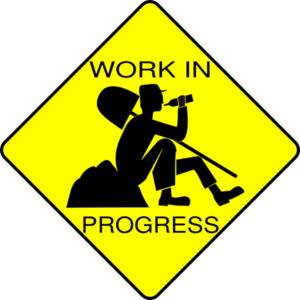